# 반복문

반복문에 붙이는 else에 관하여


else에 관하여
1. 반복문에 쓰이는 else
2. 조건문에 쓰이는 else
3. try에 쓰이는 else

In [1]:
for i in range(10):
    print(i) # 공백 조심
else:
    print('T') # 올바르게 반복문을 실행했을 때 실행된다.

0
1
2
3
4
5
6
7
8
9
T


In [1]:
for i in range(10):
    if i == 5:
        print(i) # 공백 조심
        break
else:
    print('T') # 다 돌지 않았기 때문에 T가 출력이 안된다.

5


텐서플로에서 에폭돌리는 방식이 for 방식으로 바뀌었기 때문에 이 기법이 쓰일 수 있다.

In [2]:
for i in range(10): # 컨테이너면 다 올 수 있다.
    if i == 5:
        print(i) # 공백 조심
        continue
else:
    print('T') # 컨티뉴는 출력이 된다.

5
T


set같은 경우 자신이 솔팅해서 정해주고, 딕셔너리는 좀 차이가 있다.

In [3]:
dir(range) # __iter__에 주목 -> 순회반복이 가능하다.★★★

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index',
 'start',
 'step',
 'stop']

__iter__라는 얘가 잇으면 for뒤에 쓸 수가 있는 것이다. 이것을 두고 iterable이라고 한다.

iterator라는 게 있다. 어떤 집합에서 데이터가 하나하나 나오는 구조를 말한다. 빅데이터, 인공지능에서 필요할 때 하나씩 올라가는 기법이기 때문에 좋다. 메모리 효율을 극대화한다. 이걸 레이지 기법이라고도 한다. 이걸 쓰면 메모리에 필요할 때마다 쓰기 때문에 효율이 좋다. 파이썬은 내부적으로 다 iterator 구조로 되어 있다. 

아래는 참고

In [5]:
def x():
    for i in range(10):
        if i == 5:
            print(i) 
            continue
    else:
        print('T') 

import dis

dis.dis(x)

  2           0 SETUP_LOOP              42 (to 44)
              2 LOAD_GLOBAL              0 (range)
              4 LOAD_CONST               1 (10)
              6 CALL_FUNCTION            1
              8 GET_ITER
        >>   10 FOR_ITER                22 (to 34)
             12 STORE_FAST               0 (i)

  3          14 LOAD_FAST                0 (i)
             16 LOAD_CONST               2 (5)
             18 COMPARE_OP               2 (==)
             20 POP_JUMP_IF_FALSE       10

  4          22 LOAD_GLOBAL              1 (print)
             24 LOAD_FAST                0 (i)
             26 CALL_FUNCTION            1
             28 POP_TOP

  5          30 JUMP_ABSOLUTE           10
             32 JUMP_ABSOLUTE           10
        >>   34 POP_BLOCK

  7          36 LOAD_GLOBAL              1 (print)
             38 LOAD_CONST               3 ('T')
             40 CALL_FUNCTION            1
             42 POP_TOP
        >>   44 LOAD_CONST               0 (None)
 

In [5]:
all # shift + tab 해보면 sum, any 등등 모두 iterable이 나온다. 아주 잘 이해해야 한다.

<function all(iterable, /)>

여러개를 동시에 처리하는 얘들은 분산처리라는 것이 있다. 요즘에는 다 분산환경이다. 이게 어떻게 되는지 알고 싶으면 pythontutor.com 에 들어가봐라. 내부적으로 어떻게 처리되는지 알 수 있다.

우리가 배우는 컨테이너는 싹 다 iterable이다. 그런데 때에 따라서 우리가 직접 iterator를 만들기도 한다.

# while

while은 인덱스 베이스이다. 근데 보통 조건이 있다. 객체지향하고는 좀 안 어울린다. 

어떨 때 while을 쓸까? 무한루프를 걸어야 할 경우가 있는 것이다. 사용자 입력을 기다리거나 할 때. 이럴 때 while을 쓴다.

In [6]:
i = 10
while 1:
    a= input()
    if a == 'a':
        break

ㅁ
a


In [7]:
i = 10
while i > 10:
    print(i)
    i -= 1
else:
    print('T')

T


위의 문제는 while이 한번도 안돌았지만, else가 실행된다. 그래서 어떤 책에서는 break의 유무로 else의 실행여부를 말해주기도 한다. 텐서플로도 for 문이 들어가는데, 여기서 else를 써서 제대로 돌아가는지 체크하는 테크닉이 있다.

try ~ catch를 써도 되고, 딥러닝을 할 때는 else를 써야하는 경우가 많다. 메모리 문제 때문이다.

# scope의 문제

for 문 밖에서 x가 살아난다. 나도 이거 최근에 알았지...근데 또 웃긴건  컴프리헨션 안에서는 못살아남는다.

In [8]:
for x in range(10):
    print(x)
    
x

0
1
2
3
4
5
6
7
8
9


9

In [9]:
t = [uuu for uuu in range(10)]
uuu

NameError: name 'uuu' is not defined

# 예외처리

syntex에러를 방지하는 것이다. 내가 원하는 결과가 제대로 돌아가는지 확인해보려면 print로 확인하는 경우가 많은데, 파이썬에서는 에러를 발생시키는 것을 더 선호한다. 

 - EAFP: 먼저 저질러놓고 용서를 구해라 ★
 - LBYL: 돌다리도 두드려 보고 건너라
 
그러니 에러를 발생시키면서 프로그래밍을 진행시켜라. 에러를 적극적으로 발생시켜라. 파이썬은 느린 언어기 때문에 프린트해가면서 디버깅하면 속도 저하 문제가 난다.

In [10]:
i = 9
assert i == 10

AssertionError: 

그래서 디버깅 할때 assert를 써서 에러를 발생시켜라. 프린트는 이제 버려.

또 내가 억지로 에러를 발생시킬수도 있다.

In [11]:
i = 10
if i > 9:
    raise Exception

Exception: 

근데 위의 에러도 내가 맘대로 만들 수 있다. 이건 4일 뒤에 할 수 있다. 

에러를 잡아내기 위한 구조는 크게 try ~ except가 있다. 에러가 나면 이게 실행되는 것이다.

In [26]:
try:
    a = 10 # 1/0
except ZeroDivisionError: # 여러 익셉션에 대해서 이런식으로 조건을 줄 수 있다.
    print('a')
except: # 여러 익셉션에 대해서 이런식으로 조건을 줄 수 있다.
    print('a')
else:
    print('else') # except가 실행되지 않으면 else r구문이 실행된다.
finally:
    print('finally') # except 실행여부에 상관없이 무조건 실행된다.

else
finally


In [27]:
try:
    a = 10 # 1/0
except: # 여러 익셉션에 대해서 이런식으로 조건을 줄 수 있다.
    print('a')
except ZeroDivisionError: # 여러 익셉션에 대해서 이런식으로 조건을 줄 수 있다.
    print('a')
else:
    print('else') # except가 실행되지 않으면 else r구문이 실행된다.
finally:
    print('finally') # except 실행여부에 상관없이 무조건 실행된다.

SyntaxError: default 'except:' must be last (<ipython-input-27-e7fa174d32a1>, line 5)

위의 코드가 안돌아간다. 그래서 모든 에러를 잡은 except는 마지막에 쓰는 것이 좋다. <br>

as 3가지.

1. import as
2. except as
3. with as

In [11]:
try:
    1/0 # 1/0
except ZeroDivisionError as e: # 여러 익셉션에 대해서 이런식으로 조건을 줄 수 있다.
    print(e) # division by zero

division by zero


함수 설명
1. doc
2. repr: 그냥 x라 했을 때 나오는 것
3. str: 프린트 했을 때 하는 것.

근데 

In [13]:
class X:
    '''test''' # doc string
    
    def __repr__(self):
        return 'REPR'
    
    def __str__(self):
        return 'STR'
    pass

X() # shift tab하면 설명이 나온다.
X.__doc__ # test

'test'

In [19]:
x = X()
x

REPR

In [21]:
print(x)

STR


as는 이 3개 이외에 설명이 필요할 때 나온다.

REPR 개발환경은 어떤걸 해주냐? 특별히 프린트문 안해줘도 x 이렇게 해줬을 때 뭔가 나오는 것. 이게 repr이다.

In [53]:
issubclass(bool, int) # is가 붙어있는 함수를 프레디케이트 함수라고 한다.
issubclass(ZeroDivisionError, Exception) # True

True

int 상속받아서 bool을 만들었다는 뜻이다. 식은 하나의 결과값으로 나오는 것을 말한다. 식은 함수 인자로 올 수 있고, 할당할 수 있다. 

1. 식은 식끼리 중첩 가능
2. 식은 하나의 결과값이 나오는 것
3. 식은 함수의 인자로 올 수 있음.

In [15]:
a  = 3
t = 3 if a > 2 else 4  if a > 2 else 5# 조건식이 올 수 있다. 무한정 중첩시킬 수 있다.
t # 참이라서 앞에게 나온다.

3

# 함수

파라미터와 아규먼트의 차이를 알아야 한다.

 - Parameter: 매개변수
 - argument: 인자
 
선언문: 나중에 재사용하기 위해서 어떤 특정한 것을 정의하는 문을 말한다. (재사용이 포인트) declation 함수 선언, 클래스 선언 2가지가 있다.

매개변수(파라미터)는 5가지있지만 선생님은 7가지가 있다고 한다. (외워라)<br>
 3가지 키워드
1. positional 방식 # 입력한 순서대로 들어간다. 딱히 명시하지 않아도.
2. 키워드 방식 # a=1 처럼 명시해서 사용하는 것. 순서없이 써도 된다는 장점이 있다.
3. 가변방식

매개변수와 인자(아규먼트)의 개수는 같아야 한다. 매개변수에는 디폴트 값을 지정할 수 있다. 왜 이런 테크닉이 필요한가? 파이썬은 오버로딩을 지정하지 않기 때문이다. 오버로딩이란, 이름이 똑같은데 매개변수가 다른 함수를 같은 것으로 보는 것을 말한다. 그래서 x()처럼 아무것도 안넣어도 되게, 디폴트 값을 지정해둔다. 오버로딩을 지정할수 없기 때문에 다 디폴트 값이 있는 것이다.

In [16]:
def x(a=2): # snake 방식 # a는 매개변수(파라미터)라고 한다.
    return 1

x(2) # 2는 argument라고 한다. (인자)
x()

1

In [62]:
def x(a = 3, b): # 안된다. 디폴트값은 뒤에서부터 채워야 한다.
    return 1

SyntaxError: non-default argument follows default argument (<ipython-input-62-7ce2a4be7b61>, line 1)

In [65]:
def x(a, b=2, c=4): # 한번 키워드 방식을 쓰면 그 다음 파라미터는 다 키워드 방식이다.
    return 1
x(2)

1

어떤 함수는 무조건 키워드 방식을 써야 하는 경우가 있다.

함수선언 *은 3번 나온다.

1. def(*, a): 키워드 온니 방식. * 다음엔 무조건 키워드 방식 매개변수만 쓴다.
2. def(*a) : 가변 포지셔녈 방식. 여러개 인자를 받을 수 있다.
3. def(**a): 가변 키워드 방식. 키워드 방식 인자를 여러개 받을 수 있다.
4. def(* a, ** b): 가변 포지셔닝 + 키워드 방식. 둘을 섞어 쓴다. 하지만 마지막은 역시 키워드.

---

함수 인자 관련해서

5. x(*t): 언패킹 기법. 리스트를 넣으면 리스트를 벗겨준다.
6. x(**t): 딕셔너리를 통째로 넣을 때 쓴다.

In [26]:
def y(*, a): # * 다음에 무조건 키워드 방식을 써야 한다. (키워드 온니 방식이라고도 한다.)
    return a

y(a = 3)

3

In [17]:
import matplotlib.pyplot as plt

plt.barh # shift tab 하면 중간부터 *가 나오는데, *은 아무거나 해도 되지만, * 다음은 무조건 키워드 방식을 쓴다.

<function matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)>

In [18]:
def y(*a): # 가변 포지셔널 방식. 개수 안 맞춰도 상관없이 쓸 수 있다. 별표에 이름 붙인 것이다.
    return a

y(1, 2, 3)

(1, 2, 3)

In [19]:
def y(**a): # 가변 키워드 방식
    return a

y(a = 1, b = 3, c = 4)

{'a': 1, 'b': 3, 'c': 4}

In [20]:
def y(*b, **a): # 가변 포지셔널 + 가변 키워드 방식
    return b,a

y(3, 4, 5, a = 1, b = 3, c = 4)

((3, 4, 5), {'a': 1, 'b': 3, 'c': 4})

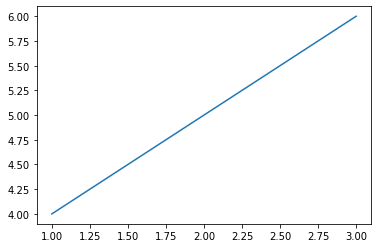

In [78]:
plt.plot([1, 2, 3], # 4. x
        [4, 5, 6]) # shitf tab을 해보면, [x]라고 되어 있는데, 이것은 옵션이라는 뜻이다. (shift tab)

In [21]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

In [22]:
def x(*a):
    return a

x(*[1, 2, 3, 4]) # 5. 이렇게 벗기는건 unpacking 기법이라고 한다.

(1, 2, 3, 4)

In [23]:
def x(**a):
    return a

t = {'a': 3, 'b':4, 'c':5}
x(**t) # 딕셔너리를 넣고 싶을 때 별 두개를 쓴다.

{'a': 3, 'b': 4, 'c': 5}

In [24]:
def x(*a):
    return a

t = {'a': 3, 'b':4, 'c':5}
x(*t) # 언패킹된다.

('a', 'b', 'c')

In [25]:
sum([1, 2, 3], 2) # shift tab -> sum(iterable, start=0, /) -> /는 무조건 포지셔널 방식만 쓸 수 있다는 것이다.
# start = 2부터 시작해서 1, 2, 3, 차례로 더하는 방식이다.

8

In [26]:
sum([1, 2, 3], start = 2) # /가 있기 때문에 키워드 방식이 안되는 것이다.

TypeError: sum() takes no keyword arguments

In [27]:
all

<function all(iterable, /)>

In [29]:
def xxx(a:int) -> int : #x에 정수값 넣으라는 뜻이다.
    return a
xxx(2) # 

2

파이썬은 다이나믹언어이기 때문에 위의 함수는 별로 권장하지 않는다.

In [30]:
dir(xxx)
xxx.__annotations__ # 강제는 아니다.

{'a': int, 'return': int}

# higer order function

함수 고급들어가기 전에 용어를 알아야 함.

1. higher order function

아래 2개가 동시에 되면 higer order function이라고 한다.

 - argument를 fuction으로 받을 수 있음
 - return을 function으로 돌릴 수 있음
 
파이썬에서는 return이 

In [31]:
def x(f):
    f() # 함수를 실행시킨다는 뜻

x는 함수라하고, x()는 함수의 리턴값이라고 한다.

괄호를 붙일 수 있는 3가지 (callable)

1. 함수
2. 클래스
3. 클래스에 __call__이 지정된 인스턴스 -> callable x 로 확인할 수 있다.

In [32]:
callable(x)

True

In [33]:
def x(f):
    f('김지우')

In [34]:
x(print) # ㅅㅂ 이게 되네.

김지우


In [35]:
def x(f):
    return f

In [36]:
x(print)('피카츄') # 와 ㅅㅂ 이게 되네

피카츄


우리가 많이 사용할 3총사

1. map
2. filter
3. reduce

이 3개는 달달 알고 있어야 한다.

In [37]:
map # /는 여기 앞까지만 포지셔널 방식으로 넣는다는 것이다.
list(map(lambda x: x+1, [2, 3, 4, 5]))

[3, 4, 5, 6]

iterable이 들어가는 얘들은 기본적으로 for를 집어넣지 않아도 되는 애들이다. 아주 중요하다. 

In [38]:
list(filter(lambda x: x>4, [2, 3, 4, 5]))

[5]

In [39]:
from functools import reduce # 함수

reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) # 이것을 리덕션 테크닉이라고 한다.

15

In [42]:
%%timeit
temp = []
for i in range(100000):
    temp.append(i+1)

8.3 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# first-class function

fuction을 데이터(객체)처럼 사용할 수 있다. 함수를 값으로 사용하는 것.

expression은 하나의 값으로 축약할 수 있는 놈. reduction 할 수 있는 놈.

자바의 경우 higer order function은 맞지만, first-class function은 아니다.

In [127]:
x = print
x('김지우')

김지우


데코레이터: @ 클래스에 함수를 추가한다.

컨테이너를 나누는 방식에서 오쏘고널이라는 것을 배움. 

In [129]:
x = [print, sum] # 이런것도 됨
x[0]('문근영')

문근영


함수를 사용하는 이유? 캡슐화. 밖에서 안으로 접근을 못한다.
이러한 성질을 이용해서 이너함수를 만들 수 있다.

In [43]:
aaa = 3
def t():
    bbb = 4
    return aaa
t() # name error
# 함수 안에서는 함수 밖에 있는 값에 접근할 수 있다.

3

In [44]:
bbb # 캡술안에 있기 때문에 그렇다.
t.bbb 
t().bbb # 다 안된다.

NameError: name 'bbb' is not defined

In [46]:
aaa = 3
def t():
    aaa = 5 # Local에서 먼저 찾기 때문에 이게 출력된다.
    bbb = 4
    return aaa
t() # name error
# 함수 안에서는 함수 밖에 있는 값에 접근할 수 있다.

5

재사용 + 은닉을 시킬 수 있다. 그래서 함수 안에 함수를 만들어두면 그 함수 안에서만 실행시킬 수 있다.

값을 찾을 때는 LEBG 방식으로 찾는다.

LEGB: Local - Enclosed - Global - Built-in

In [45]:
aaa = 3
def t():
    aaa += 1 # 접근할 수는 있지만 값을 바꿀 수는 없다.
    return aaa
t() # name error
# 함수 안에서는 함수 밖에 있는 값에 접근할 수 있다.

UnboundLocalError: local variable 'aaa' referenced before assignment

In [49]:
aaa = 3
def t():
    global aaa 
    aaa += 1 # 글로벌로 싱크로나이징해주면 가능하다. 밖의 값도 바뀐다.
    return aaa
t() # name error
# 함수 안에서는 함수 밖에 있는 값에 접근할 수 있다.

4

In [48]:
aaa # 이것이 글로벌 할당이다. 

4

In [52]:
xxx= 3 # 글로벌 변수
def t():
    xxx = 1 # 인크로징 변수, non-local 변수
    def s():
        xxx = 2
        return xxx # 로컬 변수
    return s()
t()

2

In [50]:
xxx= 3 # 글로벌 변수
def t():
    xxx = 1 # 인크로징 변수, nonlocal변수
    def s():
        nonlocal xxx #global
        return xxx # 로컬 변수
    return s()
t()

1